# Mount with google drive


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import nesscessary library


In [2]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Import regular expressions to process emails
import re

# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display, clear_output

try:
    plt.rcParams["animation.html"] = "jshtml"
except ValueError:
    plt.rcParams["animation.html"] = "html5"

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

%load_ext autoreload 
%autoreload 2

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## 1. K-means Clustering


## 1.1 Implementing K-means

### 1.1.1 Finding closest centroids


In [3]:
def findClosestCentroids(X, centroids):
    """
    Computes the centroid memberships for every example.
    
    Parameters
    ----------
    X : array_like
        The dataset of size (m, n) where each row is a single example. 
        That is, we have m examples each of n dimensions.
        
    centroids : array_like
        The k-means centroids of size (K, n). K is the number
        of clusters, and n is the the data dimension.
    
    Returns
    -------
    idx : array_like
        A vector of size (m, ) which holds the centroids assignment for each
        example (row) in the dataset X.
    
    Instructions
    ------------
    Go over every example, find its closest centroid, and store
    the index inside `idx` at the appropriate location.
    Concretely, idx[i] should contain the index of the centroid
    closest to example i. Hence, it should be a value in the 
    range 0..K-1

    Note
    ----
    You can use a for-loop over the examples to compute this.
    """
    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly.
    idx = np.zeros(X.shape[0], dtype=int)

    # ====================== YOUR CODE HERE ======================

    for i in np.arange(idx.size):
        
        J = np.sqrt(np.sum(np.square(X[i] - centroids), axis = 1))
            
        idx[i] = np.argmin(J)
    
    # =============================================================
    return idx

In [4]:
DATA_ROOT = "/content/gdrive/MyDrive/AIL/Data"

# Load an example dataset that we will be using
data = loadmat(os.path.join(DATA_ROOT, 'ex7data2.mat'))
X = data['X']

# Select an initial set of centroids
K = 3   # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Find the closest centroids for the examples using the initial_centroids
idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples:')
print(idx[:3])
print('(the closest centroids should be 0, 2, 1 respectively)')

Closest centroids for the first 3 examples:
[0 2 1]
(the closest centroids should be 0, 2, 1 respectively)


In [5]:
np.argmin(np.sqrt(np.sum(np.square(X[0] - initial_centroids), axis = 1)))

0

1.1.2 Computing centroid means


In [6]:
def computeCentroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points
    assigned to each centroid.
    
    Parameters
    ----------
    X : array_like
        The datset where each row is a single data point. That is, it 
        is a matrix of size (m, n) where there are m datapoints each
        having n dimensions. 
    
    idx : array_like 
        A vector (size m) of centroid assignments (i.e. each entry in range [0 ... K-1])
        for each example.
    
    K : int
        Number of clusters
    
    Returns
    -------
    centroids : array_like
        A matrix of size (K, n) where each row is the mean of the data 
        points assigned to it.
    
    Instructions
    ------------
    Go over every centroid and compute mean of all points that
    belong to it. Concretely, the row vector centroids[i, :]
    should contain the mean of the data points assigned to
    cluster i.

    Note:
    -----
    You can use a for-loop over the centroids to compute this.
    """
    # Useful variables
    m, n = X.shape
    # You need to return the following variables correctly.
    centroids = np.zeros((K, n))


    # ====================== YOUR CODE HERE ======================

    for i in np.arange(K):
        centroids[i] = np.mean(X[idx == i], axis = 0)
        
    
    # =============================================================
    return centroids

In [7]:
np.mean(X, axis = 0)


array([3.68437558, 2.9871008 ])

In [8]:
# Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids:')
print(centroids)
print('\nThe centroids should be')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]')

Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

The centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


### 1.2. K-means on example dataset


In [9]:

def plotProgresskMeans(i, X, centroid_history, idx_history):
    """
    A helper function that displays the progress of k-Means as it is running. It is intended for use
    only with 2D data. It plots data points with colors assigned to each centroid. With the
    previous centroids, it also plots a line between the previous locations and current locations
    of the centroids.
    Parameters
    ----------
    i : int
        Current iteration number of k-means. Used for matplotlib animation function.
    X : array_like
        The dataset, which is a matrix (m x n). Note since the plot only supports 2D data, n should
        be equal to 2.
    centroid_history : list
        A list of computed centroids for all iteration.
    idx_history : list
        A list of computed assigned indices for all iterations.
    """
    K = centroid_history[0].shape[0]
    plt.gcf().clf()
    cmap = plt.cm.rainbow
    norm = mpl.colors.Normalize(vmin=0, vmax=2)

    for k in range(K):
        current = np.stack([c[k, :] for c in centroid_history[:i+1]], axis=0)
        plt.plot(current[:, 0], current[:, 1],
                    '-Xk',
                    mec='k',
                    lw=2,
                    ms=10,
                    mfc=cmap(norm(k)),
                    mew=2)

        plt.scatter(X[:, 0], X[:, 1],
                       c=idx_history[i],
                       cmap=cmap,
                       marker='o',
                       s=8**2,
                       linewidths=1,)
    plt.grid(False)
    plt.title('Iteration number %d' % (i+1))

In [10]:
def runkMeans(X, centroids, findClosestCentroids, computeCentroids,
              max_iters=10, plot_progress=False):
    """
    Runs the K-means algorithm.
    Parameters
    ----------
    X : array_like
        The data set of size (m, n). Each row of X is a single example of n dimensions. The
        data set is a total of m examples.
    centroids : array_like
        Initial centroid location for each clusters. This is a matrix of size (K, n). K is the total
        number of clusters and n is the dimensions of each data point.
    findClosestCentroids : func
        A function (implemented by student) reference which computes the cluster assignment for
        each example.
    computeCentroids : func
        A function(implemented by student) reference which computes the centroid of each cluster.
    max_iters : int, optional
        Specifies the total number of interactions of K-Means to execute.
    plot_progress : bool, optional
        A flag that indicates if the function should also plot its progress as the learning happens.
        This is set to false by default.
    Returns
    -------
    centroids : array_like
        A (K x n) matrix of the computed (updated) centroids.
    idx : array_like
        A vector of size (m,) for cluster assignment for each example in the dataset. Each entry
        in idx is within the range [0 ... K-1].
    anim : FuncAnimation, optional
        A matplotlib animation object which can be used to embed a video within the jupyter
        notebook. This is only returned if `plot_progress` is `True`.
    """
    K = centroids.shape[0]
    idx = None
    idx_history = []
    centroid_history = []

    for i in range(max_iters):
        idx = findClosestCentroids(X, centroids)

        if plot_progress:
            idx_history.append(idx)
            centroid_history.append(centroids)

        centroids = computeCentroids(X, idx, K)

    if plot_progress:
        fig = plt.figure()
        anim = FuncAnimation(fig, plotProgresskMeans,
                             frames=max_iters,
                             interval=500,
                             repeat_delay=2,
                             fargs=(X, centroid_history, idx_history))
        return centroids, idx, anim

    return centroids, idx


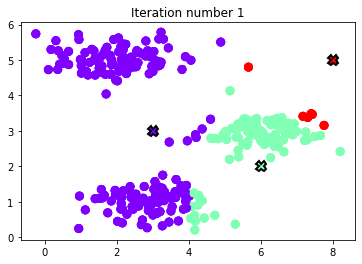

In [11]:
# Load an example dataset
data = loadmat(os.path.join(DATA_ROOT, 'ex7data2.mat'))

# Settings for running K-Means
K = 3
max_iters = 50

# For consistency, here we set centroids to specific values
# but in practice you want to generate them automatically, such as by
# settings them to be random examples (as can be seen in
# kMeansInitCentroids).
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])


# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
centroids, idx, anim = runkMeans(X, initial_centroids,
                                       findClosestCentroids, computeCentroids, max_iters, True)
anim

### 1.3. Random initialization


In [12]:
def kMeansInitCentroids(X, K):
    """
    This function initializes K centroids that are to be used in K-means on the dataset x.
    
    Parameters
    ----------
    X : array_like 
        The dataset of size (m x n).
    
    K : int
        The number of clusters.
    
    Returns
    -------
    centroids : array_like
        Centroids of the clusters. This is a matrix of size (K x n).
    
    Instructions
    ------------
    You should set centroids to randomly chosen examples from the dataset X.
    """
    m, n = X.shape
    
    # You should return this values correctly
    centroids = np.zeros((K, n))

    # ====================== YOUR CODE HERE ======================

    randidx = np.random.permutation(X.shape[0])
    # Take the first K examples as centroids
    centroids = X[randidx[:K], :]
    
    # =============================================================
    return centroids

(16384, 3)
[[0.00036651 0.00039627 0.00035492]
 [0.00125339 0.00087868 0.00065376]
 [0.00343944 0.00231369 0.00107687]
 [0.00380742 0.00359667 0.00299513]
 [0.0005147  0.00054585 0.00050838]
 [0.0011226  0.00108638 0.00114368]
 [0.00074001 0.00074537 0.00073912]
 [0.00256396 0.00188175 0.00088187]
 [0.00183457 0.00133627 0.0007718 ]
 [0.00174156 0.00153787 0.00150204]
 [0.00234665 0.00202789 0.00186328]
 [0.00350826 0.00294103 0.00192486]
 [0.00026076 0.00028336 0.00024348]
 [0.00181097 0.00219929 0.00296186]
 [0.00302112 0.00282433 0.00282096]
 [0.0029711  0.00250106 0.00163059]]
(16384,)


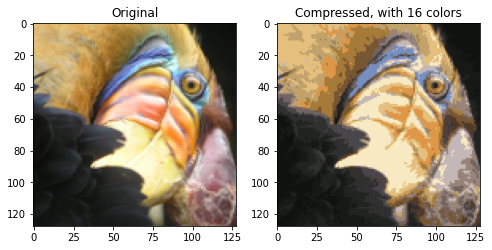

In [13]:
# ======= Experiment with these parameters ================
# You should try different values for those parameters
K = 16
max_iters = 10

# Load an image of a bird
# Change the file name and path to experiment with your own images
A = mpl.image.imread(os.path.join(DATA_ROOT, 'bird_small.png'))
# ==========================================================

# Divide by 255 so that all values are in the range 0 - 1
A /= 255

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = A.reshape(-1, 3)
print(X.shape)
# When using K-Means, it is important to randomly initialize centroids
# You should complete the code in kMeansInitCentroids above before proceeding
initial_centroids = kMeansInitCentroids(X, K)

# Run K-Means
centroids, idx = runkMeans(X, initial_centroids,
                                 findClosestCentroids,
                                 computeCentroids,
                                 max_iters)
print(centroids)
print(idx.shape)
# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by its index in idx) to the centroid value
# Reshape the recovered image into proper dimensions
X_recovered = centroids[idx, :].reshape(A.shape)

# Display the original image, rescale back by 255
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(A*255)
ax[0].set_title('Original')
ax[0].grid(False)

# Display compressed image, rescale back by 255
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed, with %d colors' % K)
ax[1].grid(False)

# 2. Principal Component Analysis


### 2.1 Example Dataset


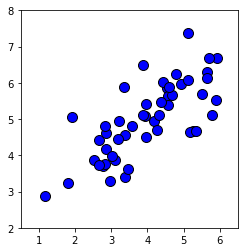

In [14]:
# Load the dataset into the variable X 
data = loadmat(os.path.join(DATA_ROOT, 'ex7data1.mat'))
X = data['X']

#  Visualize the example dataset
plt.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=1)
plt.axis([0.5, 6.5, 2, 8])
plt.gca().set_aspect('equal')
plt.grid(False)

### 2.2. Implementing PCA

In [15]:
def pca(X):
    """
    Run principal component analysis.
    
    Parameters
    ----------
    X : array_like
        The dataset to be used for computing PCA. It has dimensions (m x n)
        where m is the number of examples (observations) and n is 
        the number of features.
    
    Returns
    -------
    U : array_like
        The eigenvectors, representing the computed principal components
        of X. U has dimensions (n x n) where each column is a single 
        principal component.
    
    S : array_like
        A vector of size n, contaning the singular values for each
        principal component. Note this is the diagonal of the matrix we 
        mentioned in class.
    
    Instructions
    ------------
    You should first compute the covariance matrix. Then, you
    should use the "svd" function to compute the eigenvectors
    and eigenvalues of the covariance matrix. 

    Notes
    -----
    When computing the covariance matrix, remember to divide by m (the
    number of examples).
    """
    # Useful values
    m, n = X.shape

    # You need to return the following variables correctly.
    U = np.zeros(n)
    S = np.zeros(n)

    # ====================== YOUR CODE HERE ======================

    Sigma = (1 / m) * (X.T.dot(X))
    U, S, V = np.linalg.svd(Sigma)
    
    # ============================================================
    return U, S

In [16]:
def featureNormalize(X):
    """
    Normalizes the features in X returns a normalized version of X where the mean value of each
    feature is 0 and the standard deviation is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    Parameters
    ----------
    X : array_like
        An dataset which is a (m x n) matrix, where m is the number of examples,
        and n is the number of dimensions for each example.
    Returns
    -------
    X_norm : array_like
        The normalized input dataset.
    mu : array_like
        A vector of size n corresponding to the mean for each dimension across all examples.
    sigma : array_like
        A vector of size n corresponding to the standard deviations for each dimension across
        all examples.
    """
    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm /= sigma
    return X_norm, mu, sigma

Top eigenvector: U[:, 0] = [-0.707107 -0.707107]
 (you should expect to see [-0.707107 -0.707107])


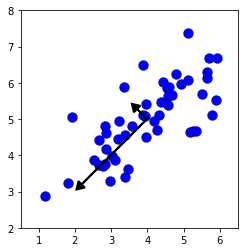

In [17]:
#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=0.25)

for i in range(2):
    ax.arrow(mu[0], mu[1], 1.5 * S[i]*U[0, i], 1.5 * S[i]*U[1, i],
             head_width=0.25, head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

ax.axis([0.5, 6.5, 2, 8])
ax.set_aspect('equal')
ax.grid(False)

print('Top eigenvector: U[:, 0] = [{:.6f} {:.6f}]'.format(U[0, 0], U[1, 0]))
print(' (you should expect to see [-0.707107 -0.707107])')

### 2.3. Dimensionality Reduction with PCA


2.3.1 Projecting the data onto the principal components

In [18]:
def projectData(X, U, K):
    """
    Computes the reduced data representation when projecting only 
    on to the top K eigenvectors.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). The dataset is assumed to be 
        normalized.
    
    U : array_like
        The computed eigenvectors using PCA. This is a matrix of 
        shape (n x n). Each column in the matrix represents a single
        eigenvector (or a single principal component).
    
    K : int
        Number of dimensions to project onto. Must be smaller than n.
    
    Returns
    -------
    Z : array_like
        The projects of the dataset onto the top K eigenvectors. 
        This will be a matrix of shape (m x k).
    
    Instructions
    ------------
    Compute the projection of the data using only the top K 
    eigenvectors in U (first K columns). 
    For the i-th example X[i,:], the projection on to the k-th 
    eigenvector is given as follows:
    
        x = X[i, :]
        projection_k = np.dot(x,  U[:, k])

    """
    # You need to return the following variables correctly.
    Z = np.zeros((X.shape[0], K))

    # ====================== YOUR CODE HERE ======================

    Z = np.dot(X,  U[:, :K])
    
    # =============================================================
    return Z

In [19]:
#  Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: {:.6f}'.format(Z[0, 0]))
print('(this value should be about    : 1.481274)')

Projection of the first example: 1.481274
(this value should be about    : 1.481274)


2.3.2 Reconstructing an approximation of the data


In [21]:
def recoverData(Z, U, K):
    """
    Recovers an approximation of the original data when using the 
    projected data.
    
    Parameters
    ----------
    Z : array_like
        The reduced data after applying PCA. This is a matrix
        of shape (m x K).
    
    U : array_like
        The eigenvectors (principal components) computed by PCA.
        This is a matrix of shape (n x n) where each column represents
        a single eigenvector.
    
    K : int
        The number of principal components retained
        (should be less than n).
    
    Returns
    -------
    X_rec : array_like
        The recovered data after transformation back to the original 
        dataset space. This is a matrix of shape (m x n), where m is 
        the number of examples and n is the dimensions (number of
        features) of original datatset.
    
    Instructions
    ------------
    Compute the approximation of the data by projecting back
    onto the original space using the top K eigenvectors in U.
    For the i-th example Z[i,:], the (approximate)
    recovered data for dimension j is given as follows:

        v = Z[i, :]
        recovered_j = np.dot(v, U[j, :K])

    Notice that U[j, :K] is a vector of size K.
    """
    # You need to return the following variables correctly.
    X_rec = np.zeros((Z.shape[0], U.shape[0]))

    # ====================== YOUR CODE HERE ======================

    X_rec = Z.dot(U[:, :K].T)

    # =============================================================
    return X_rec

Approximation of the first example: [-1.047419 -1.047419]
       (this value should be about  [-1.047419 -1.047419])


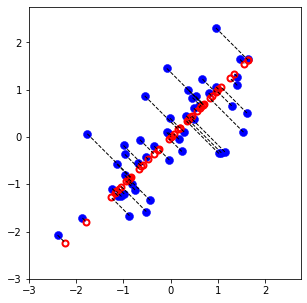

In [23]:
X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: [{:.6f} {:.6f}]'.format(X_rec[0, 0], X_rec[0, 1]))
print('       (this value should be about  [-1.047419 -1.047419])')

#  Plot the normalized dataset (returned from featureNormalize)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X_norm[:, 0], X_norm[:, 1], 'bo', ms=8, mec='b', mew=0.5)
ax.set_aspect('equal')
ax.grid(False)
plt.axis([-3, 2.75, -3, 2.75])

# Draw lines connecting the projected points to the original points
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_norm, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

## 2.4 Face Image Dataset

In [27]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Displays 2D data in a nice grid.
    Parameters
    ----------
    X : array_like
        The input data of size (m x n) where m is the number of examples and n is the number of
        features.
    example_width : int, optional
        THe width of each 2-D image in pixels. If not provided, the image is assumed to be square,
        and the width is the floor of the square root of total number of pixels.
    figsize : tuple, optional
        A 2-element tuple indicating the width and height of figure in inches.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = int(n / example_width)

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_height, example_width, order='F'), cmap='gray')
        ax.axis('off')

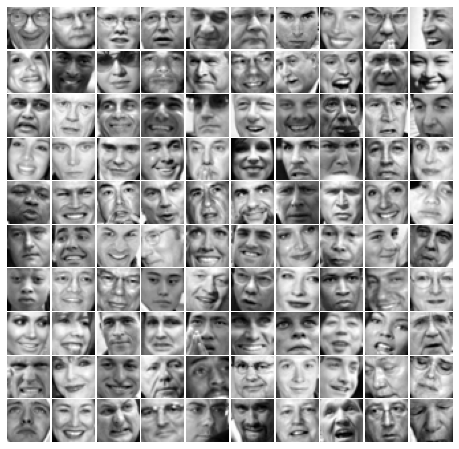

In [28]:
#  Load Face dataset
data = loadmat(os.path.join(DATA_ROOT, 'ex7faces.mat'))
X = data['X']

#  Display the first 100 faces in the dataset
displayData(X[:100, :], figsize=(8, 8))

2.4.1 PCA on Faces


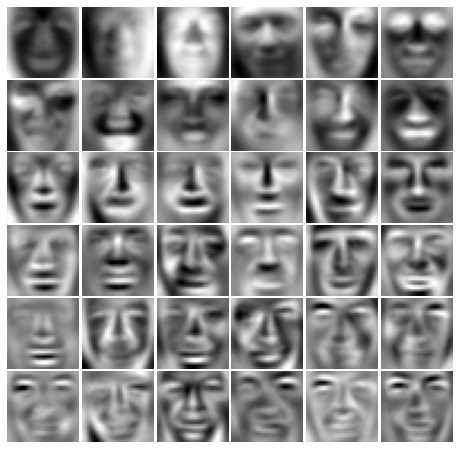

In [29]:
#  normalize X by subtracting the mean value from each feature
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Visualize the top 36 eigenvectors found
displayData(U[:, :36].T, figsize=(8, 8))

2.4.2 Dimensionality Reduction

In [30]:
#  Project images to the eigen space using the top k eigenvectors 
#  If you are applying a machine learning algorithm 
K = 100
Z = projectData(X_norm, U, K)

print('The projected data Z has a shape of: ', Z.shape)

The projected data Z has a shape of:  (5000, 100)


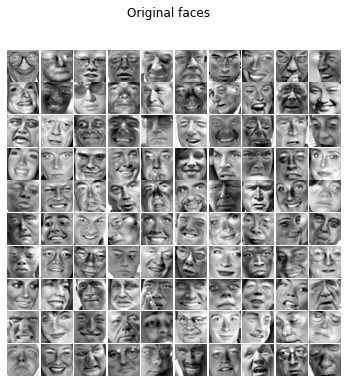

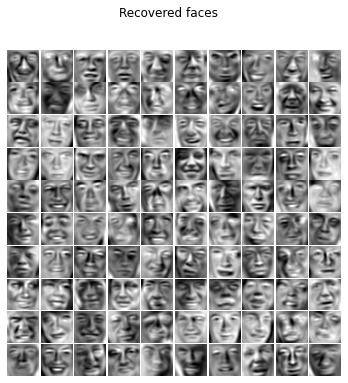

In [31]:
#  Project images to the eigen space using the top K eigen vectors and 
#  visualize only using those K dimensions
#  Compare to the original input, which is also displayed
K = 100
X_rec  = recoverData(Z, U, K)

# Display normalized data
displayData(X_norm[:100, :], figsize=(6, 6))
plt.gcf().suptitle('Original faces')

# Display reconstructed data from only k eigenfaces
displayData(X_rec[:100, :], figsize=(6, 6))
plt.gcf().suptitle('Recovered faces')
pass

### 2.5 Optional (ungraded) exercise: PCA for visualization


In [34]:
# this allows to have interactive plot to rotate the 3-D plot
# The double identical statement is on purpose
# see: https://stackoverflow.com/questions/43545050/using-matplotlib-notebook-after-matplotlib-inline-in-jupyter-notebook-doesnt
%matplotlib notebook
%matplotlib notebook
from matplotlib import pyplot


A = mpl.image.imread(os.path.join(DATA_ROOT, 'bird_small.png'))
A /= 255
X = A.reshape(-1, 3)

# perform the K-means clustering again here
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids,
                                 findClosestCentroids,
                                 computeCentroids, max_iters)

#  Sample 1000 random indexes (since working with all the data is
#  too expensive. If you have a fast computer, you may increase this.
sel = np.random.choice(X.shape[0], size=1000)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[sel, 0], X[sel, 1], X[sel, 2], cmap='rainbow', c=idx[sel], s=8**2)
ax.set_title('Pixel dataset plotted in 3D.\nColor shows centroid memberships')
pass

<IPython.core.display.Javascript object>

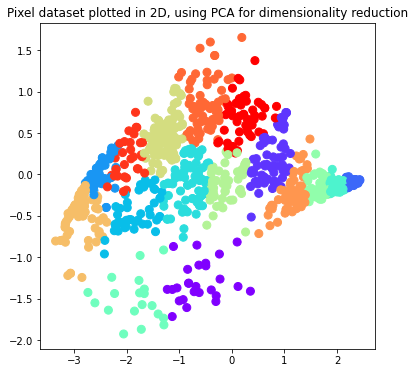

In [36]:
# Subtract the mean to use PCA
X_norm, mu, sigma = featureNormalize(X)

# PCA and project the data to 2D
U, S = pca(X_norm)
Z = projectData(X_norm, U, 2)

# Reset matplotlib to non-interactive
%matplotlib inline

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(Z[sel, 0], Z[sel, 1], cmap='rainbow', c=idx[sel], s=64)
ax.set_title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')
ax.grid(False)
pass